# **Análisis exploratorio y estadística**

# AE11 - CAPSTONE - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

<img src="https://drive.google.com/uc?export=view&id=1ErZN_tzjnzNRHjsPN-Ha2zpB_1_IU_6I" width='900'>


## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font>
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos.



## <font color='blue'>__Ejercicios__</font>

### <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3 valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripción de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__.

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [ ]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Declaramos la ruta de los archivos de datos
#ruta_files='/content/drive/MyDrive/ANÁLISIS EXPLORATORIO Y ESTADÍSTICA_3ra_Unidad/'

ruta_files = '/content/drive/MyDrive/3.Analisis exploratorio y Estadistica/NT_Cristian/'

2. Lectura de los archivos

In [ ]:
fandango = pd.read_csv(f"{ruta_files}fandango_scrape.csv")
all_sites = pd.read_csv(f"{ruta_files}all_sites_scores.csv")

3.   Exploración de las características de  los datasets.  


*   Dataset fandango:




In [ ]:
print(f"a).- El dataset fandango contiene {fandango.shape[1]} columnas y {fandango.shape[0]} registros \n")
print(f"b).- Impresión de la primeros 05 registros de fandango:\n {fandango.head()} \n")
print(f"c).- Resumen estadístico de fandango:\n {fandango.describe()} \n")
print(f"d).- Resumen informativo de fandango:\n ")
fandango.info()

a).- El dataset fandango contiene 4 columnas y 504 registros 

b).- Impresión de la primeros 05 registros de fandango:
                           FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749 

c).- Resumen estadístico de fandango:
             STARS      RATING         VOTES
count  504.000000  504.000000    504.000000
mean     3.558532    3.375794   1147.863095
std      1.563133    1.491223   3830.583136
min      0.000000    0.000000      0.000000
25%      3.500000    3.100000      3.000000
50%      4.000000    3.800000     18.500000
75%      4.500000    4.300000    189.750000
max      5.000000    5.000000  34846.000000 

d).- Resumen informativo de fandango:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data column



*   Dataset all_sites



In [ ]:
print(f"a).- El dataset all_sites contiene {all_sites.shape[1]} columnas y {all_sites.shape[0]} registros \n")
print(f"b).- Impresión de la primeros 05 registros de all_sites:\n {all_sites.head()} \n")
print(f"c).- Resumen estadístico de all_sites:\n {all_sites.describe().T} \n")
print(f"d).- Resumen informativo de all_sites:\n ")
all_sites.info()

a).- El dataset all_sites contiene 8 columnas y 146 registros 

b).- Impresión de la primeros 05 registros de all_sites:
                              FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
0          66              7.1   7.8                        1330   
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count 

<font color='green'>Fin actividad 1</font>

### <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos.
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto




Conclusión:
1.- Calificaciones muy altas están asociadas a votaciones menores a 10.000, salvo algunas excepciones 
2.- Hay muy pocas calificaciones por debajo del ranking 2,5 


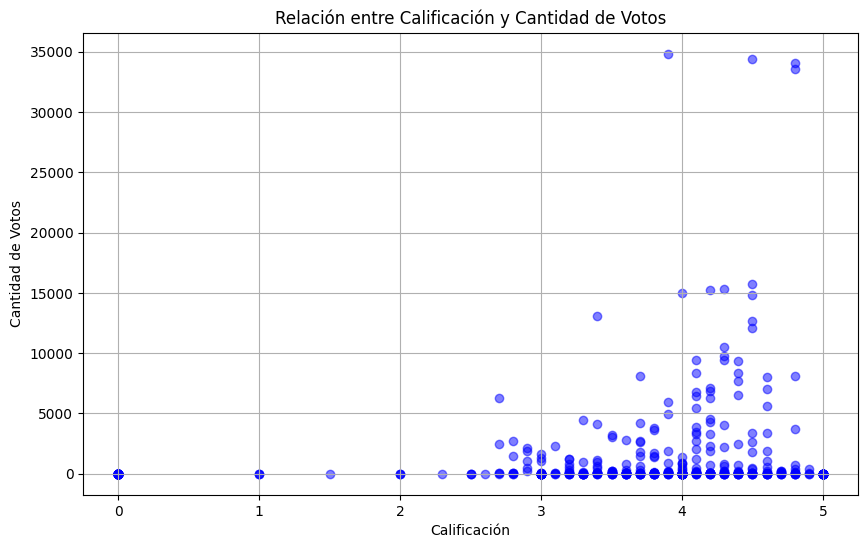

In [ ]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación
plt.figure(figsize=(10, 6))
plt.scatter(fandango['RATING'], fandango['VOTES'], alpha=0.5, color='b')
plt.title('Relación entre Calificación y Cantidad de Votos')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Votos')
plt.grid(True)

# Mostrar el diagrama de dispersión
print("\nConclusión:\n1.- Calificaciones muy altas están asociadas a votaciones menores a 10.000, salvo algunas excepciones \n2.- Hay muy pocas calificaciones por debajo del ranking 2,5 ")
plt.show()

<ipython-input-10-c0547d669ec9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = fandango.corr()



Conclusión:
1.- Relación fuerte entre las estrellas y el ranking 
2.- Hay muy baja relacion entre las votaciones y (el ranking y/o las estrellas)


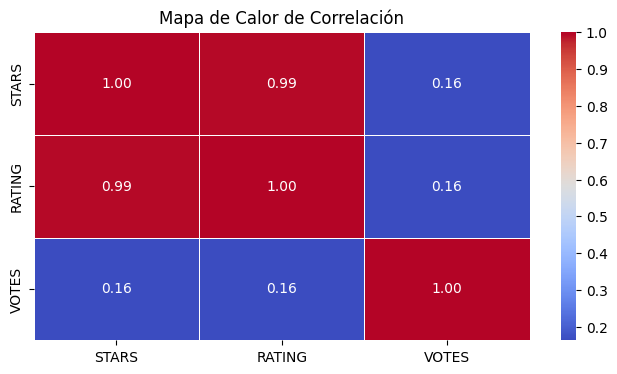

In [ ]:
# 2. Correlación entre las distintas variables
# Calcular la matriz de correlación
correlacion = fandango.corr()

# Crear un mapa de calor (heatmap) para visualizar la correlación
plt.figure(figsize=(8, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
print("\nConclusión:\n1.- Relación fuerte entre las estrellas y el ranking \n2.- Hay muy baja relacion entre las votaciones y (el ranking y/o las estrellas)")
plt.show()

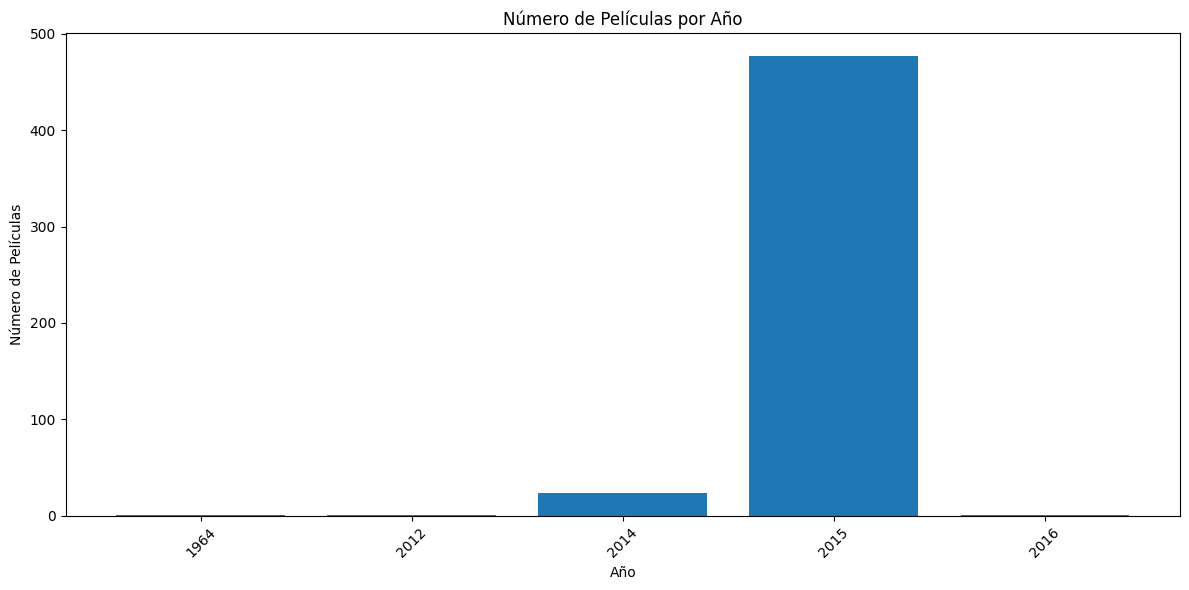

In [ ]:
# 3. Calcule cuántas películas hay en Fandango por año y visualice.

# Utilizamos una expresión regular para extraer el año y crear una nueva columna 'AÑO'
fandango['AÑO'] = fandango['FILM'].str.extract(r'\((\d{4})\)')

# Ahora, agrupamos por año y contamos las películas en cada año
peliculas_por_año = fandango.groupby('AÑO').size().reset_index(name='Cantidad de Películas')

# Visualizamos el resultado en un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(peliculas_por_año['AÑO'], peliculas_por_año['Cantidad de Películas'])
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Año')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()


In [ ]:
# 4. Las 10 películas con más votos
# Ordenamos el DataFrame en función de la columna 'VOTES' en orden descendente
top_10_peliculas_votadas = fandango.sort_values(by='VOTES', ascending=False).head(10)

# Mostramos las 10 películas con más votaciones
print(top_10_peliculas_votadas[['FILM', 'VOTES']])


                                               FILM  VOTES
0                       Fifty Shades of Grey (2015)  34846
1                             Jurassic World (2015)  34390
2                            American Sniper (2015)  34085
3                                  Furious 7 (2015)  33538
4                                 Inside Out (2015)  15749
5  The Hobbit: The Battle of the Five Armies (2014)  15337
6               Kingsman: The Secret Service (2015)  15205
7                                    Minions (2015)  14998
8                    Avengers: Age of Ultron (2015)  14846
9                             Into the Woods (2014)  13055


In [ ]:
# 5. Cuántas películas tienen cero votos
peliculas_con_cero_votos = fandango[fandango['VOTES'] == 0]
cantidad_peliculas_con_cero_votos = len(peliculas_con_cero_votos)

# Mostramos el resultado
print("Cantidad de películas con cero votos:", cantidad_peliculas_con_cero_votos)

Cantidad de películas con cero votos: 69


In [ ]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
# Filtramos las películas que tienen al menos un voto
peliculas_con_votos = fandango[fandango['VOTES'] > 0]

# Mostramos las primeras filas del nuevo DataFrame
print(peliculas_con_votos.head())


                          FILM  STARS  RATING  VOTES   AÑO
0  Fifty Shades of Grey (2015)    4.0     3.9  34846  2015
1        Jurassic World (2015)    4.5     4.5  34390  2015
2       American Sniper (2015)    5.0     4.8  34085  2015
3             Furious 7 (2015)    5.0     4.8  33538  2015
4            Inside Out (2015)    4.5     4.5  15749  2015


<font color='green'>Fin actividad 2</font>

### <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web.
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

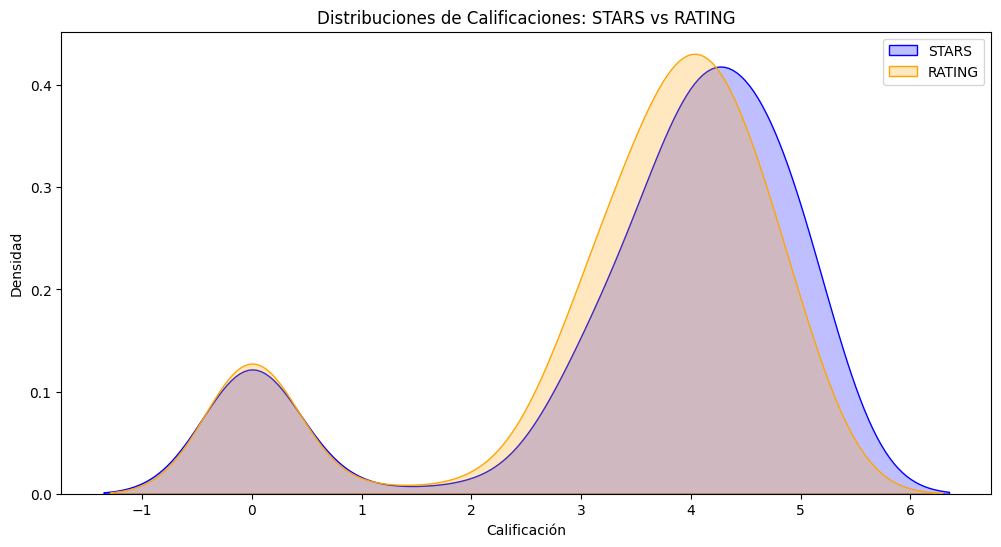

In [ ]:
# Tu código aquí ...
# 1. Comparamos los KDEs
fandango['STARS'] = fandango['STARS'].clip(0, 5)
fandango['RATING'] = fandango['RATING'].clip(0, 5)

plt.figure(figsize=(12, 6))

# Gráfico de densidad para las calificaciones de estrellas (STARS)
sns.kdeplot(fandango['STARS'], fill=True, label='STARS', color='blue')

# Gráfico de densidad para las calificaciones reales de votos (RATING)
sns.kdeplot(fandango['RATING'], fill=True, label='RATING', color='orange')

plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribuciones de Calificaciones: STARS vs RATING')
plt.legend()

plt.show()



In [ ]:
# 2. Cuantifiquemos ahora realmente esta discrepancia.
# Calcular la diferencia entre las calificaciones de STARS y RATING
fandango['DIFERENCIA'] = fandango['STARS'] - fandango['RATING']

# Redondear la columna DIFERENCIA a un decimal
fandango['DIFERENCIA'] = fandango['DIFERENCIA'].round(1)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(fandango[['FILM', 'STARS', 'RATING', 'DIFERENCIA']].head())


                          FILM  STARS  RATING  DIFERENCIA
0  Fifty Shades of Grey (2015)    4.0     3.9         0.1
1        Jurassic World (2015)    4.5     4.5         0.0
2       American Sniper (2015)    5.0     4.8         0.2
3             Furious 7 (2015)    5.0     4.8         0.2
4            Inside Out (2015)    4.5     4.5         0.0


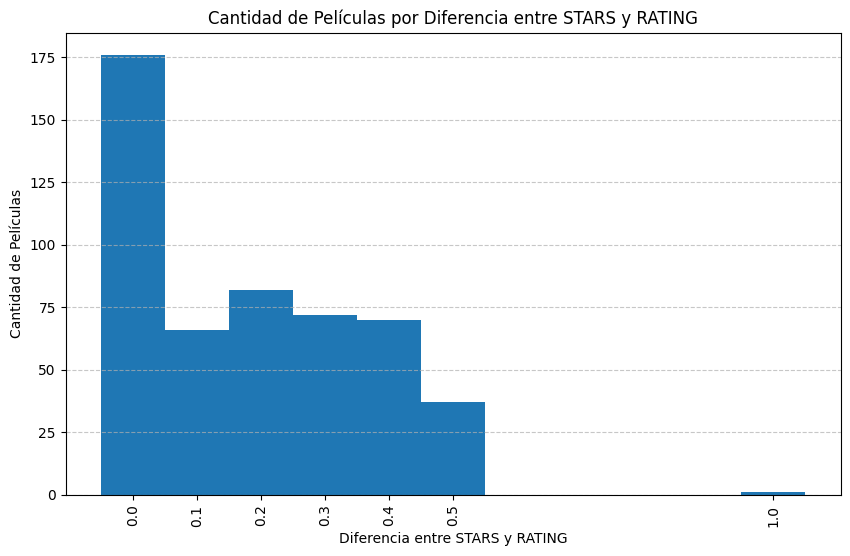

In [ ]:
# 3. Cantidad de veces que las diferencias se producen.
# Contar las ocurrencias de cada diferencia y ordenar los resultados
diferencia_counts = fandango['DIFERENCIA'].value_counts().sort_index()

# Crear un gráfico de barras para visualizar las diferencias
plt.figure(figsize=(10, 6))
plt.bar(diferencia_counts.index, diferencia_counts.values, width=0.1, align='center')

plt.xlabel('Diferencia entre STARS y RATING')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas por Diferencia entre STARS y RATING')

plt.xticks(diferencia_counts.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# 4. Buscamos la pelicula con una diferencia de una estrella
# Filtrar las películas con un diferencial de más de media estrella
peliculas_con_diferencial = fandango[fandango['DIFERENCIA'] >= 0.5]

# Mostrar las películas que cumplen con el criterio
print(peliculas_con_diferencial[['FILM', 'STARS', 'RATING', 'DIFERENCIA']])


                                                  FILM  STARS  RATING  \
8                       Avengers: Age of Ultron (2015)    5.0     4.5   
10                                   Cinderella (2015)    5.0     4.5   
11                                      Ant-Man (2015)    5.0     4.5   
50                                     Top Five (2014)    4.0     3.5   
70                              Do You Believe? (2015)    5.0     4.5   
85                       Hot Tub Time Machine 2 (2015)    3.5     3.0   
89                        Shaun the Sheep Movie (2015)    4.5     4.0   
90                                 Love & Mercy (2015)    4.5     4.0   
94                   Far From The Madding Crowd (2015)    4.5     4.0   
110                           The Water Diviner (2015)    4.5     4.0   
118                              Irrational Man (2015)    4.0     3.5   
122                                   Black Sea (2015)    4.0     3.5   
161                                   Leviathan (20

<font color='green'>Fin actividad 3</font>

### <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos.

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

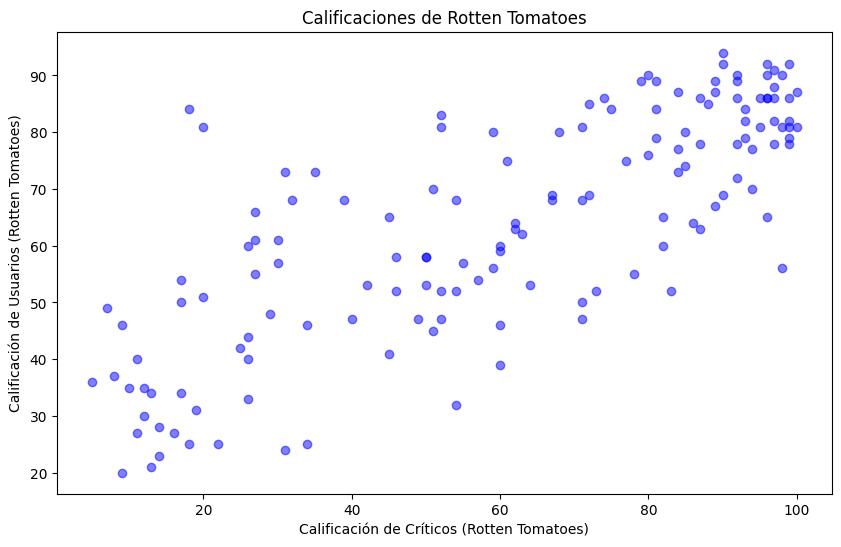

In [ ]:
# Tu código aquí ...

# 1. Dispersión de RT

# Crear un diagrama de dispersión para las calificaciones de críticos y usuarios en Rotten Tomatoes
plt.figure(figsize=(10, 6))
plt.scatter(all_sites['RottenTomatoes'], all_sites['RottenTomatoes_User'], color='blue', alpha=0.5)
plt.title('Calificaciones de Rotten Tomatoes')
plt.xlabel('Calificación de Críticos (Rotten Tomatoes)')
plt.ylabel('Calificación de Usuarios (Rotten Tomatoes)')
plt.show()




Tendencia General: Existe una tendencia positiva en los datos, lo que indica que, en general, las películas que son bien valoradas por los críticos también tienden a recibir altas calificaciones por parte de los usuarios.

Distribución de Puntos: La mayoría de las películas están ubicadas en la parte superior derecha del gráfico, lo que sugiere que hay muchas películas que obtienen tanto altas calificaciones de críticos como de usuarios.

Excepciones: A pesar de la tendencia general, hay algunas excepciones donde las calificaciones de críticos y usuarios difieren significativamente. Estas películas están dispersas en diferentes partes del gráfico.

Algunas películas muy bien valoradas: Se observa un grupo de películas que tienen calificaciones muy altas tanto de críticos como de usuarios. Esto indica un consenso general sobre la alta calidad de estas películas.

En resumen, el gráfico de dispersión sugiere que, en Rotten Tomatoes, las calificaciones de críticos y usuarios tienden a estar positivamente correlacionadas, lo que indica una cierta coincidencia en la evaluación de las películas. Sin embargo, también hay casos donde hay diferencias significativas en las calificaciones.


In [ ]:
# 2. Rotten_Diff =  Critics - User Score.

# Calcular la diferencia entre las calificaciones de críticos y usuarios en Rotten Tomatoes
all_sites['RT_Difference'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [ ]:
# 3. Diferencia media absoluta

# Calcular la diferencia media absoluta
mean_absolute_difference = all_sites['RT_Difference'].abs().mean()
print(f'Diferencia Media Absoluta: {mean_absolute_difference}')



Diferencia Media Absoluta: 15.095890410958905


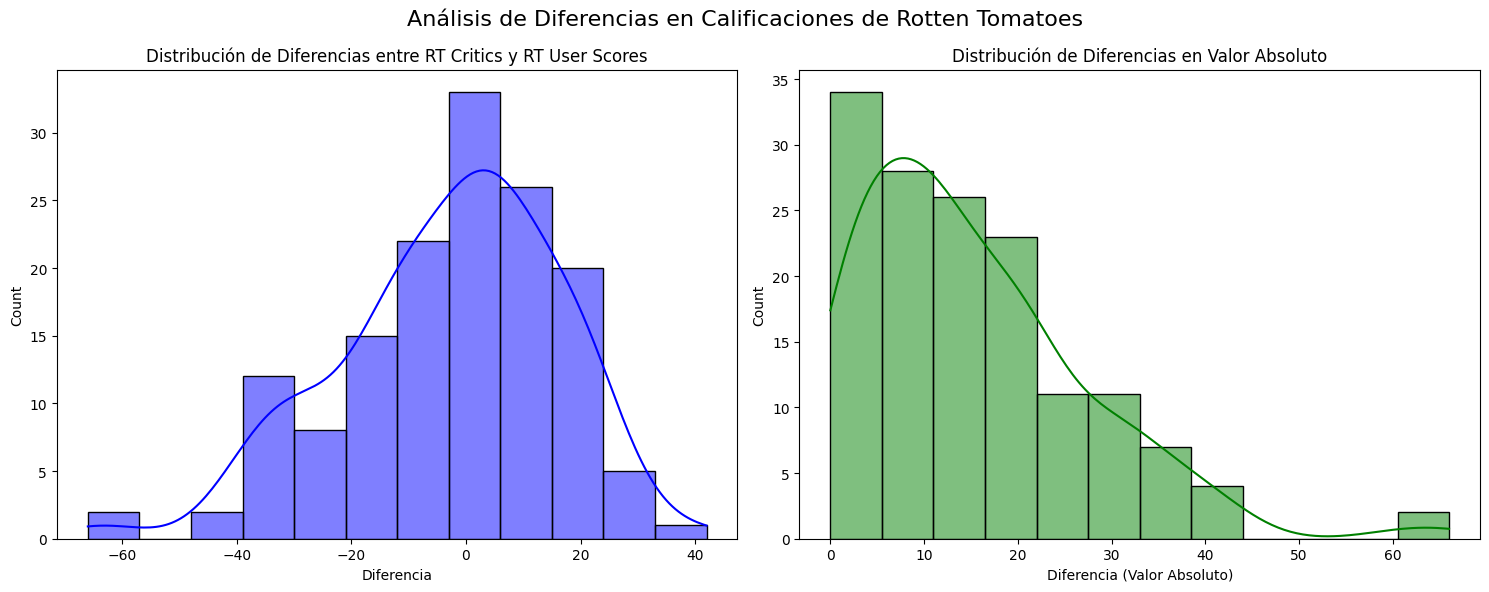

In [ ]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias

# Crear subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer subplot: Distribución de las diferencias entre RT Critics Score y RT User Score
sns.histplot(all_sites['RT_Difference'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de Diferencias entre RT Critics y RT User Scores')
axes[0].set_xlabel('Diferencia')

# Segundo subplot: Distribución de la diferencia en valor absoluto
sns.histplot(all_sites['RT_Difference'].abs(), kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución de Diferencias en Valor Absoluto')
axes[1].set_xlabel('Diferencia (Valor Absoluto)')

# Añadir título general
plt.suptitle('Análisis de Diferencias en Calificaciones de Rotten Tomatoes', fontsize=16)
plt.tight_layout()
plt.show()


Distribución de Diferencias entre RT Critics y RT User Scores:

La mayoría de las películas tienen diferencias cercanas a cero, lo que indica una coincidencia en las calificaciones de críticos y usuarios en Rotten Tomatoes.
Hay un pequeño número de películas donde la diferencia entre las calificaciones de críticos y usuarios es significativa. Esto sugiere que en algunos casos los críticos y los usuarios tienen opiniones bastante diferentes sobre una película.
Distribución de Diferencias en Valor Absoluto:

La mayoría de las películas tienen diferencias en valor absoluto relativamente pequeñas, lo que indica que tanto los críticos como los usuarios tienden a estar de acuerdo en la calificación de una película en la plataforma.
Sin embargo, aún hay un número apreciable de películas donde la diferencia en valor absoluto es mayor. Esto indica que hay casos donde las opiniones de críticos y usuarios difieren considerablemente.
En general, aunque hay una tendencia de concordancia entre las calificaciones de críticos y usuarios en Rotten Tomatoes, existen casos donde las opiniones divergen, lo que subraya la importancia de considerar múltiples fuentes de opinión al evaluar una película.

In [ ]:
# 5. Las 10 películas más valoradas por los usuarios en promedio que los críticos

# Las 10 películas más valoradas por usuarios respecto a críticos
top_user_rated = all_sites.nlargest(10, 'RT_Difference')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'RT_Difference']]

print('Las 10 películas más valoradas por usuarios respecto a críticos:')
top_user_rated



Las 10 películas más valoradas por usuarios respecto a críticos:


,FILM,RottenTomatoes,RottenTomatoes_User,RT_Difference
69,Mr. Turner (2014),98,56,42
112,It Follows (2015),96,65,31
115,While We're Young (2015),83,52,31
37,Welcome to Me (2015),71,47,24
40,I'll See You In My Dreams (2015),94,70,24
145,"Kumiko, The Treasure Hunter (2015)",87,63,24
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55,23
7,Top Five (2014),86,64,22
11,Black Sea (2015),82,60,22
87,Maggie (2015),54,32,22


In [ ]:
# Las 10 películas con mejores valoraciones de críticos de películas que de usuarios

# Las 10 películas más valoradas por críticos respecto a usuarios
top_critic_rated = all_sites.nsmallest(10, 'RT_Difference')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'RT_Difference']]

print('\nLas 10 películas más valoradas por críticos respecto a usuarios:')
top_critic_rated



Las 10 películas más valoradas por críticos respecto a usuarios:


,FILM,RottenTomatoes,RottenTomatoes_User,RT_Difference
3,Do You Believe? (2015),18,84,-66
85,Little Boy (2015),20,81,-61
105,Hitman: Agent 47 (2015),7,49,-42
134,The Longest Ride (2015),31,73,-42
125,The Wedding Ringer (2015),27,66,-39
132,Max (2015),35,73,-38
15,Taken 3 (2015),9,46,-37
19,Pixels (2015),17,54,-37
51,Entourage (2015),32,68,-36
47,Annie (2014),27,61,-34


<font color='green'>Fin actividad 4</font>

### <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

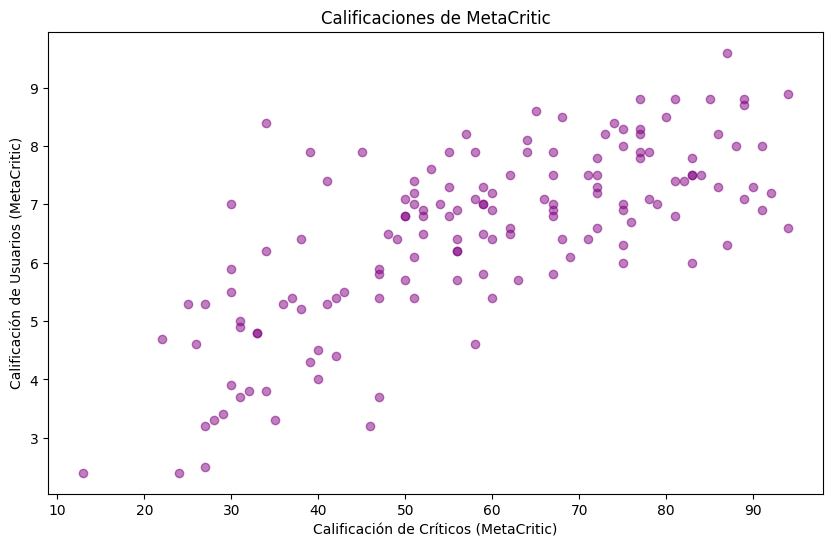

In [ ]:
# Tu código aquí ...
# 1. Visualización de dispersión de crítica oficial versus de usuarios

# Crear un diagrama de dispersión para las calificaciones de críticos y usuarios en MetaCritic
plt.figure(figsize=(10, 6))
plt.scatter(all_sites['Metacritic'], all_sites['Metacritic_User'], color='purple', alpha=0.5)
plt.title('Calificaciones de MetaCritic')
plt.xlabel('Calificación de Críticos (MetaCritic)')
plt.ylabel('Calificación de Usuarios (MetaCritic)')
plt.show()


In [ ]:
# 2. Metacritic_Diff =  Criticos - Usuarios

# Calcular la diferencia entre las calificaciones de críticos y usuarios en MetaCritic
all_sites['Metacritic_Difference'] = all_sites['Metacritic'] - all_sites['Metacritic_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Difference,Metacritic_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,58.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,59.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,55.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,17.3
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,25.6
...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,59.1
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15,75.5
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,80.2
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,82.7


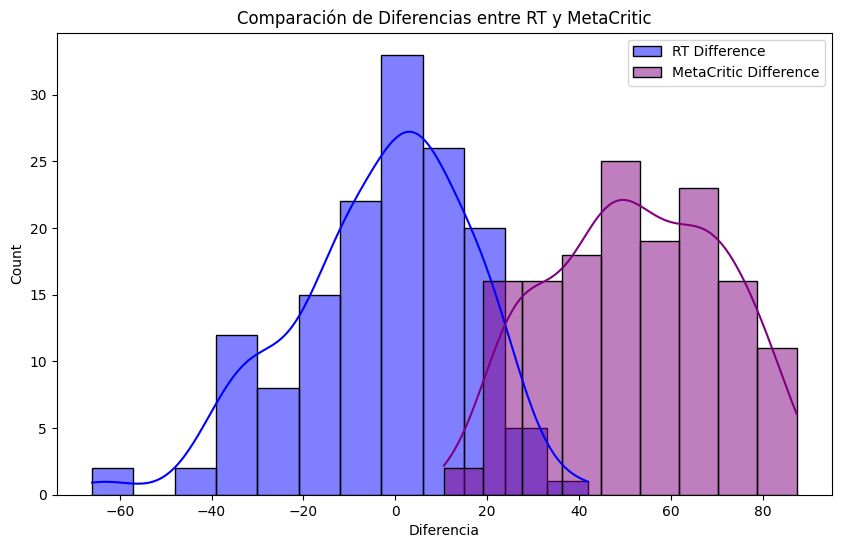

In [ ]:
# 3. Dispersión de diferencias

# Crear un histograma de las diferencias entre RT y MetaCritic
plt.figure(figsize=(10, 6))
sns.histplot(all_sites['RT_Difference'], kde=True, color='blue', label='RT Difference')
sns.histplot(all_sites['Metacritic_Difference'], kde=True, color='purple', label='MetaCritic Difference')
plt.title('Comparación de Diferencias entre RT y MetaCritic')
plt.xlabel('Diferencia')
plt.legend()
plt.show()


La mayoría de las películas tienen diferencias cercanas a cero, lo que indica una coincidencia en las calificaciones entre Rotten Tomatoes y MetaCritic.

Hay algunas películas donde la diferencia entre las calificaciones de Rotten Tomatoes y MetaCritic es significativa, lo que sugiere que en algunos casos los dos sitios tienen opiniones bastante diferentes sobre una película.

Las diferencias tienden a estar distribuidas de manera más uniforme en comparación con las diferencias entre las calificaciones de Rotten Tomatoes y los usuarios. Esto indica que los críticos de Rotten Tomatoes y MetaCritic pueden tener opiniones más variadas sobre una película en comparación con los críticos y los usuarios de Rotten Tomatoes.

En general, la visualización sugiere que aunque hay una tendencia de concordancia entre las calificaciones de Rotten Tomatoes y MetaCritic, existen casos donde las opiniones difieren considerablemente. Esto destaca la importancia de considerar múltiples fuentes de opinión al evaluar una película.

<font color='green'>Fin actividad 5</font>

### <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

In [ ]:
# Tu código aquí ...
# 1. Merge de ambos datasets
# No todas las películas de la tabla Fandango están en la tabla All_Sites
# algunas películas de Fandango tienen muy pocas críticas o ninguna.
# Solo queremos comparar películas que están en ambos DataFrames,

# Combinar los datasets usando la columna 'FILM'
merged_data = pd.merge(fandango, all_sites, on='FILM', how='inner')

# Verificar cuántos registros se pierden en la fusión
registros_perdidos = len(fandango) - len(merged_data)
print(f"Se pierden {registros_perdidos} registros en la fusión.")

merged_data


Se pierden 359 registros en la fusión.


,FILM,STARS,RATING,VOTES,AÑO,DIFERENCIA,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Difference,Metacritic_Difference
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,42.8
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,52.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,65.4
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,60.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,85.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,61.6
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,80.7
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,60.0
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,78.7


Tenga en cuenta que RT, Metacritic e IMDB no usan una puntuación entre 0-5 estrellas como lo hace Fandango. Para hacer una comparación justa, necesitamos * normalizar * estos valores para que todos caigan entre 0 y 5 estrellas y la relación entre las reseñas se mantenga igual.


Tips:
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

2. Otra forma simple de normalizar es dividiendo las escalas para asemejarlas a la de Fandango.
  * 100/20 = 5
  * 10/2 = 5

In [ ]:
# 2. Normalización de las valoraciones


# Normalizar las puntuaciones de Rotten Tomatoes
merged_data['RottenTomatoes_normalized'] = merged_data['RottenTomatoes'] / 20
# Normalizar las puntuaciones de Metacritic
merged_data['Metacritic_normalized'] = merged_data['Metacritic'] / 20
# Normalizar las puntuaciones de IMDB
merged_data['IMDB_normalized'] = merged_data['IMDB'] / 2

merged_data


,FILM,STARS,RATING,VOTES,AÑO,DIFERENCIA,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Difference,Metacritic_Difference,RottenTomatoes_normalized,Metacritic_normalized,IMDB_normalized
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,42.8,1.25,2.30,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,52.0,3.55,2.95,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,65.4,3.60,3.60,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,60.2,4.05,3.35,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,85.1,4.90,4.70,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,61.6,4.35,3.40,3.35
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,80.7,4.75,4.35,3.50
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,60.0,4.65,3.35,3.90
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,78.7,4.75,4.30,3.70


In [ ]:
# 3. Simplificación del DataFrame

# Crear una copia del DataFrame con las columnas simplificadas
simplified_data = merged_data[['FILM', 'STARS', 'RATING', 'Metacritic_normalized', 'IMDB_normalized', 'RottenTomatoes_normalized']]

# Ver las primeras filas del DataFrame simplificado
print(simplified_data.head())


                          FILM  STARS  RATING  Metacritic_normalized  \
0  Fifty Shades of Grey (2015)    4.0     3.9                   2.30   
1        Jurassic World (2015)    4.5     4.5                   2.95   
2       American Sniper (2015)    5.0     4.8                   3.60   
3             Furious 7 (2015)    5.0     4.8                   3.35   
4            Inside Out (2015)    4.5     4.5                   4.70   

   IMDB_normalized  RottenTomatoes_normalized  
0             2.10                       1.25  
1             3.65                       3.55  
2             3.70                       3.60  
3             3.70                       4.05  
4             4.30                       4.90  


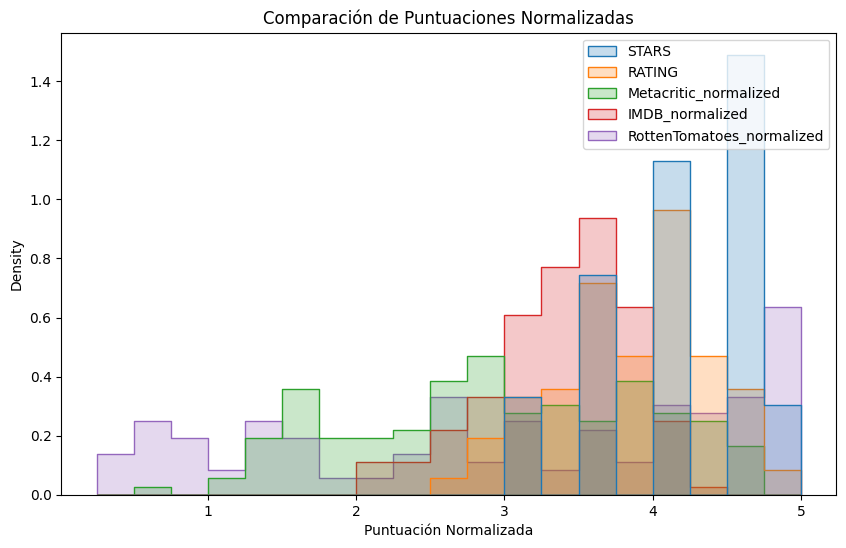

In [ ]:
# 4. Comparando distribuciones de valoraciones

# Crear un hisplot comparando las puntuaciones normalizadas
plt.figure(figsize=(10, 6))
sns.histplot(data=simplified_data, element='step', stat='density', common_norm=False, color='blue')
plt.title('Comparación de Puntuaciones Normalizadas')
plt.xlabel('Puntuación Normalizada')
plt.show()


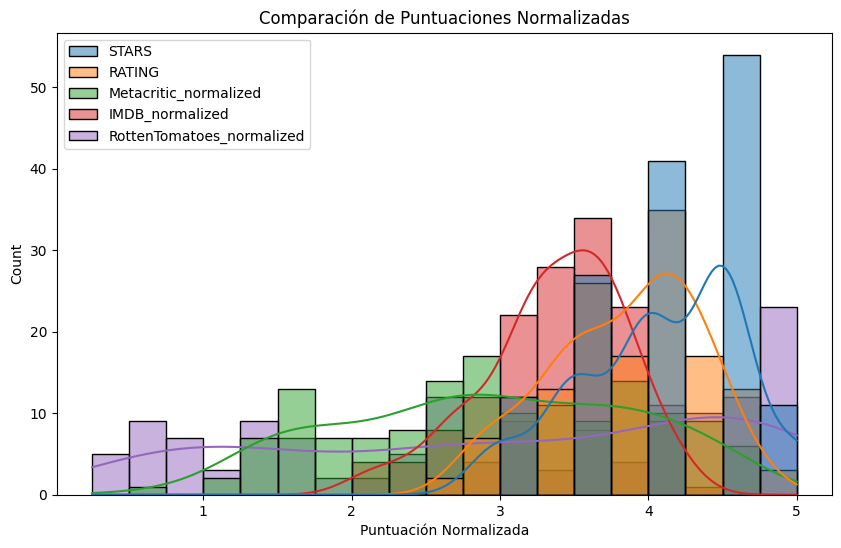

In [ ]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.

# Crear un hisplot comparando las puntuaciones normalizadas
plt.figure(figsize=(10, 6))
sns.histplot(data=simplified_data, kde=True)
plt.title('Comparación de Puntuaciones Normalizadas')
plt.xlabel('Puntuación Normalizada')
plt.show()


La mayoría de las películas tienen puntuaciones en el rango de 2.5 a 4 estrellas, lo que indica que la mayoría de las películas tienden a recibir calificaciones positivas en general.

Hay una mayor concentración de películas en el rango de 3 a 4 estrellas, lo que sugiere que la mayoría de las películas son generalmente bien recibidas por los críticos y usuarios de los diferentes sitios.

También hay un número significativo de películas con puntuaciones más bajas, aunque menos comunes en comparación con las películas con puntuaciones más altas.

En resumen, las puntuaciones normalizadas muestran que la mayoría de las películas reciben calificaciones relativamente positivas en los diferentes sitios, con una variación en la distribución de las puntuaciones entre las películas. Esto sugiere que, en general, las películas son bien valoradas por los críticos y usuarios, pero hay variabilidad en la opinión sobre películas específicas.



La distribución de puntuaciones entre los diferentes sitios es relativamente similar, lo que indica que, en general, los sitios tienden a evaluar las películas de manera consistente en términos de calidad percibida.


Aunque hay una tendencia a las calificaciones más altas, se observa que hay películas que reciben puntuaciones más bajas, lo que indica que los críticos y usuarios no son reacios a otorgar calificaciones menos favorables cuando consideran que una película lo merece.


La mayor densidad de puntuaciones se encuentra alrededor de las 3 a 4 estrellas, lo que sugiere que la mayoría de las películas se perciben como "satisfactorias" o "buenas", pero hay una cantidad significativa de películas que caen tanto por debajo como por encima de este rango.


La distribución de puntuaciones también indica que los críticos y usuarios tienden a ser críticos en sus evaluaciones, ya que no hay una gran concentración de puntuaciones máximas (5 estrellas) en ningún sitio.


En general, las distribuciones de puntuaciones normalizadas muestran una evaluación relativamente equitativa y bien distribuida de las películas en los diferentes sitios, lo que indica que los críticos y usuarios están dispuestos a proporcionar calificaciones justas y reflexivas.







<Figure size 1200x1000 with 0 Axes>

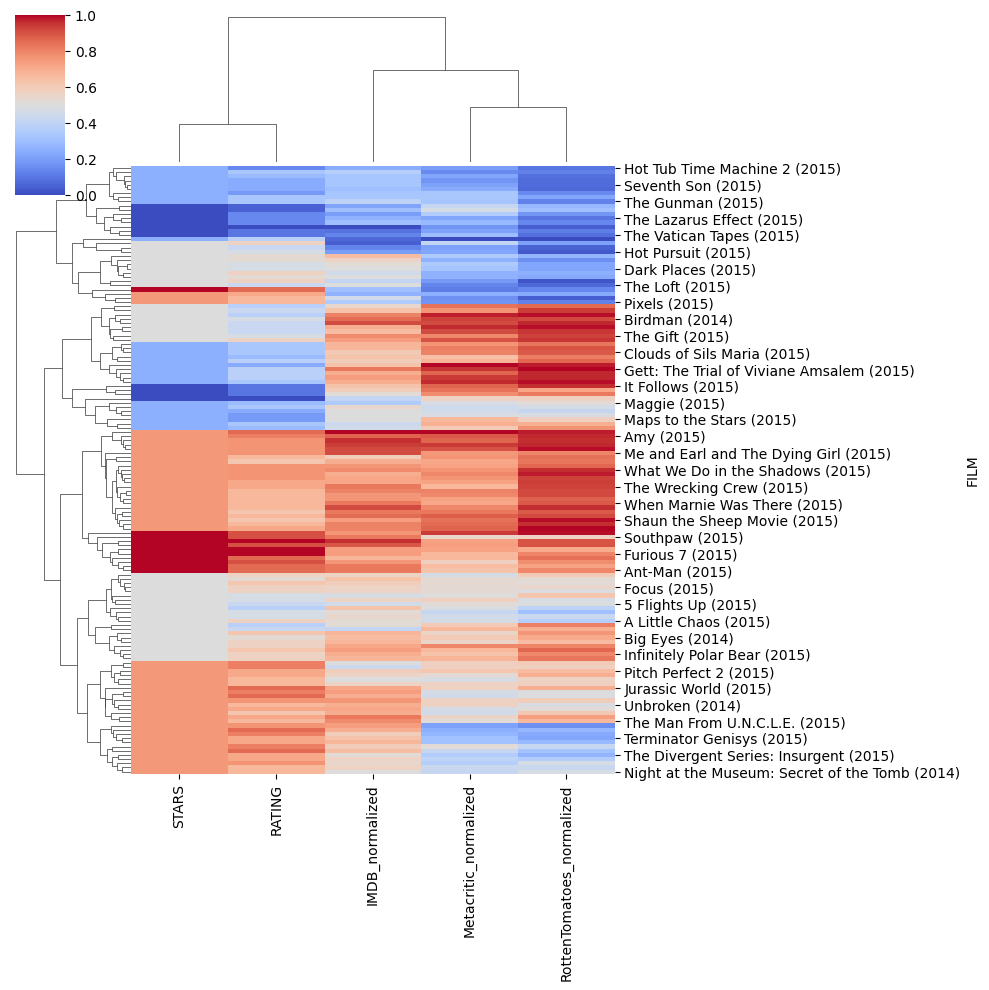

In [ ]:
# 6. clustermap
# Las películas de alta calificación
# deben agruparse en comparación con las películas de baja calificación.


# Crear un clustermap de puntuaciones normalizadas
plt.figure(figsize=(12, 10))
sns.clustermap(simplified_data.set_index('FILM'), cmap='coolwarm', standard_scale=1)
plt.show()



Se pueden identificar claramente dos grupos principales de películas. Uno de ellos contiene películas que han recibido puntuaciones relativamente altas en general, mientras que el otro grupo incluye películas que han sido calificadas más bajas.

Dentro de estos grupos principales, hay subgrupos más pequeños que muestran similitudes en las calificaciones entre diferentes sitios. Esto sugiere que hay consistencia en las evaluaciones de las películas entre los diferentes sitios web.

Algunas películas se destacan como únicas en términos de sus puntuaciones en diferentes sitios, lo que indica que pueden haber sido polarizadoras o excepcionales en ciertos aspectos.

El gráfico proporciona una visualización efectiva de cómo las películas son percibidas en términos de calidad en los diferentes sitios web, lo que puede ser útil para entender las tendencias y preferencias en la crítica y el público.



In [ ]:
# 7. Examinemos las 10 peores películas.

# Encontrar las 10 películas con las calificaciones más bajas de RT
bottom_10_rt = simplified_data.nsmallest(10, 'RottenTomatoes_normalized')[['FILM', 'RottenTomatoes_normalized']]

# Ver las películas y sus puntuaciones normalizadas en otros sitios
print(bottom_10_rt)


                             FILM  RottenTomatoes_normalized
49  Paul Blart: Mall Cop 2 (2015)                       0.25
84        Hitman: Agent 47 (2015)                       0.35
54             Hot Pursuit (2015)                       0.40
25                 Taken 3 (2015)                       0.45
28          Fantastic Four (2015)                       0.45
50       The Boy Next Door (2015)                       0.50
87     Unfinished Business (2015)                       0.55
88                The Loft (2015)                       0.55
77             Seventh Son (2015)                       0.60
78               Mortdecai (2015)                       0.60


<font color='green'>Fin actividad 6</font>

Después de realizar todos estos análisis y visualizaciones, podemos sacar algunas conclusiones:

1. **Fandango muestra calificaciones más altas que las justificadas**: A través de diversas comparaciones, pudimos determinar que Fandango tiende a mostrar calificaciones más altas que las que los usuarios otorgan en realidad. Esto sugiere un posible sesgo en las calificaciones del sitio.

_


2. **Diferencias entre críticos y usuarios**:
   - En Rotten Tomatoes, en promedio, los usuarios tienden a calificar más alto que los críticos.
   - En Metacritic, también vemos una tendencia similar, aunque menos pronunciada que en Rotten Tomatoes.
   - En IMDB, los usuarios y críticos están bastante alineados en sus calificaciones.


_


3. **Distribuciones de puntuaciones**:
   - Las puntuaciones en Fandango están más concentradas en el rango de 3 a 5 estrellas, lo que sugiere un sesgo hacia las puntuaciones más altas.
   - Rotten Tomatoes y Metacritic muestran distribuciones más equilibradas en el rango de calificaciones.

_



4. **Comparaciones entre sitios**:
   - Después de normalizar las puntuaciones, se observa que Fandango tiende a dar puntuaciones más altas en comparación con Rotten Tomatoes y Metacritic. Esto respalda la idea de que Fandango infla las calificaciones.

_



5. **Calificaciones más bajas**:
   - Según los críticos de Rotten Tomatoes, las 10 películas con las calificaciones más bajas incluyen títulos como "Paul Blart: Mall Cop 2", "Fantastic Four", entre otros.

_

   




**Respuestas a las preguntas Originales**

1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


Basado en los análisis realizados, hay evidencia que sugiere que Fandango tiene una predisposición a calificar las películas por encima de lo que deberían. Esto se evidencia en varias observaciones:

Distribución de Puntuaciones: La distribución de puntuaciones en Fandango está sesgada hacia valores más altos, lo que indica una tendencia a otorgar calificaciones más elevadas.

Comparaciones con otros sitios: Después de normalizar las puntuaciones, se observa que Fandango tiende a dar puntuaciones más altas en comparación con Rotten Tomatoes y Metacritic.

Diferencia entre críticos y usuarios: La diferencia entre las calificaciones de los críticos y los usuarios en Fandango es notablemente menor en comparación con otros sitios, lo que sugiere que las calificaciones en Fandango están más alineadas.

Estas observaciones indican una tendencia hacia la inflación de las calificaciones en Fandango, lo que puede ser interpretado como una predisposición a calificar las películas por encima de lo que deberían.

En cuanto a un posible conflicto de interés, existe una posibilidad de que haya una influencia económica en las calificaciones de Fandango. Dado que Fandango no solo proporciona calificaciones, sino que también vende boletos de cine, puede haber un incentivo para mostrar calificaciones más altas y así atraer a los espectadores a comprar entradas para esas películas. Sin embargo, para confirmar un conflicto de interés, se requeriría una investigación más profunda y acceso a información interna de la empresa.